In [1]:
%load_ext cudf.pandas

# Boolean Indexing & Masking

## Learning Objectives

* The concept of boolean masks
* Dropping/Masking data using `where`
* Using `isin` for creating a boolean mask

## Overview

*Boolean masking*, known as *boolean indexing*, is a functionality in Python that enables the filtering of values based on a specific condition.

A boolean mask refers to a binary array or a boolean-valued (`True`/`False`) array that is used as a *filter* to select specific elements from another array. The boolean mask acts as a criterion or condition, where each element in the mask corresponds to an element in the target array. An element in the target array is selected when the corresponding `mask` value is `True`. 

Xarray provides different capabilities to allow filtering and boolean indexing. In this notebook, we will learn more about it.

First, let's import the packages needed for this notebook: 

In [2]:
%%cudf.pandas.profile

import cartopy.crs as ccrs
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl

xr.set_options(display_expand_attrs=False)
np.set_printoptions(threshold=10, edgeitems=2)

                                                                                              
                                  Total time elapsed: 1.925 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In this tutorial, we’ll use the Regional Arctic System Mode (RASM) example dataset

In [3]:
%%cudf.pandas.profile

ds = xr.tutorial.load_dataset("rasm").isel(time=0)
ds

<xarray.Dataset>
Dimensions:  (y: 205, x: 275)
Coordinates:
    time     object 1980-09-16 12:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: y, x
Data variables:
    Tair     (y, x) float64 nan nan nan nan nan ... 27.91 27.02 26.56 26.73
Attributes: (11)

                                                                                                       
                                       Total time elapsed: 5.305 seconds                               
                                     0 GPU function calls in 0.000 seconds                             
                                    34 CPU function calls in 0.044 seconds                             
                                                                                                       
                                                     Stats                                             
                                                                                                       
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function          ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ isna              │ 0          │ 0.000       │ 0.000       │ 8          │ 0.005       │ 0.001       │
│ Index             │ 0          │ 0.000       │ 0.000       │ 1          │ 0.004       │ 0.004       │
│ Index.__len__     │ 0          │ 0.000       │ 0.000       │ 19         │ 0.026       │ 0.001       │
│ Index.copy        │ 0          │ 0.000       │ 0.000       │ 2          │ 0.003       │ 0.001       │
│ Index.__setattr__ │ 0          │ 0.000       │ 0.000       │ 2          │ 0.003       │ 0.002       │
│ Index.__getitem__ │ 0          │ 0.000       │ 0.000       │ 1          │ 0.001       │ 0.001       │
│ Series            │ 0          │ 0.000       │ 0.000       │ 1          │ 0.002       │ 0.002       │
└───────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna
- Index
- Index.__len__
- Index.copy
- Index.__setattr__
- Index.__getitem__
- Series

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=238880;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In this dataset, the logical coordinates are `x` and `y`, while the physical coordinates are `xc` and `yc`, which represent the latitudes and longitude of the data.

In [4]:
%%cudf.pandas.profile

print(ds.xc.attrs)
print(ds.yc.attrs)

{'long_name': 'longitude of grid cell center', 'units': 'degrees_east'}
{'long_name': 'latitude of grid cell center', 'units': 'degrees_north'}


                                                                                              
                                  Total time elapsed: 0.032 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [5]:
%%cudf.pandas.profile

da = ds.Tair
da

<xarray.DataArray 'Tair' (y: 205, x: 275)>
array([[        nan,         nan, ...,         nan,         nan],
       [        nan,         nan, ...,         nan,         nan],
       ...,
       [        nan,         nan, ..., 26.80261869, 27.08603517],
       [        nan,         nan, ..., 26.56473862, 26.73064933]])
Coordinates:
    time     object 1980-09-16 12:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: y, x
Attributes: (4)

                                                                                              
                                  Total time elapsed: 0.072 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

## Masking with `where()`

Indexing methods on Xarray objects generally return a subset of the original data. However, it is sometimes useful to select an object with the same shape as the original data, but with some elements masked. 

By applying `.where()`, the original data's shape is maintained, with values masked based on a Boolean condition. Values that satisfy the condition (`True`) are returned unchanged, while values that do not meet the condition (`False`) are replaced with a predefined value.

In the example below, we replace all `nan` values with `-9999`:

In [6]:
%%cudf.pandas.profile

# Let's replace the missing values (nan) with some placeholder
ds.Tair.where(ds.Tair.notnull(), -9999)

<xarray.DataArray 'Tair' (y: 205, x: 275)>
array([[-9999.        , -9999.        , ..., -9999.        ,
        -9999.        ],
       [-9999.        , -9999.        , ..., -9999.        ,
        -9999.        ],
       ...,
       [-9999.        , -9999.        , ...,    26.80261869,
           27.08603517],
       [-9999.        , -9999.        , ...,    26.56473862,
           26.73064933]])
Coordinates:
    time     object 1980-09-16 12:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: y, x
Attributes: (4)

                                                                                              
                                  Total time elapsed: 2.244 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                5 CPU function calls in 0.009 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Series   │ 0          │ 0.000       │ 0.000       │ 3          │ 0.006       │ 0.002       │
│ isna     │ 0          │ 0.000       │ 0.000       │ 2          │ 0.002       │ 0.001       │
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Series
- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=770813;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

As you can see, in the example above `.where()` preserved the **shape** of the original data by masking the values with a boolean condition. 

Most uses of `.where()` check whether or not specific data values are less than or greater than a constant value. 

The data values specified in the boolean condition of `.where()` can be any of the following:

* a `DataArray`
* a `Dataset`
* a function

In the following example, we make use of `.where()` to mask all temperature below 0°C.



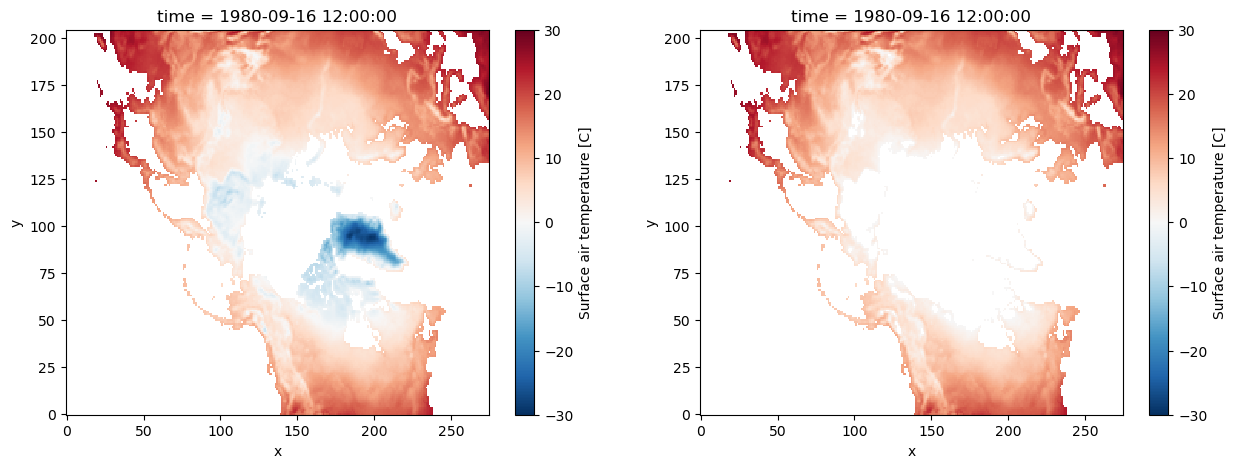

                                                                                                        
                                       Total time elapsed: 3.165 seconds                                
                                     44 GPU function calls in 0.017 seconds                             
                                     11 CPU function calls in 0.015 seconds                             
                                                                                                        
                                                     Stats                                              
                                                                                                        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function           ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Series             │ 0          │ 0.000       │ 0.000       │ 7          │ 0.012       │ 0.002       │
│ isna               │ 0          │ 0.000       │ 0.000       │ 4          │ 0.003       │ 0.001       │
│ Index              │ 8          │ 0.003       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ RangeIndex.__len__ │ 36         │ 0.013       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Series
- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=374405;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [7]:
%%cudf.pandas.profile

da_masked = da.where(da >= 0)

# -- making both plots for comparison:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# -- for reference (without masking):
da.plot(ax=axes[0], vmin=-30, vmax=30, cmap=mpl.cm.RdBu_r)

# -- masked DataArray
da_masked.plot(ax=axes[1], vmin=-30, vmax=30, cmap=mpl.cm.RdBu_r);

```{tip}
By default Xarray set the masked values to `nan`. But as we saw in the first example, we can set it to other values too. 
```

```{exercise}
:label: boolean-2

Using the syntax you’ve learned so far, mask all the points with latitudes above 60° N.
```


In [8]:
%%cudf.pandas.profile

# write your answer here!

                                                                                              
                                  Total time elapsed: 0.032 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

````{solution} boolean-2
:class: dropdown
```python
da_masked = da.where(da.yc >= 60)
da_masked[:, :].plot();
```
````

As mentioned above, by default `where` maintains the original size of the data. You can use  the option `drop=True` to clip coordinate elements that are fully masked:

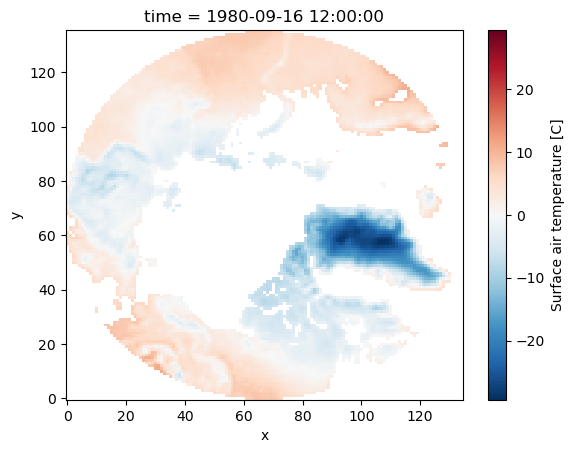

                                                                                                        
                                       Total time elapsed: 1.650 seconds                                
                                     22 GPU function calls in 0.009 seconds                             
                                     25 CPU function calls in 0.036 seconds                             
                                                                                                        
                                                     Stats                                              
                                                                                                        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function           ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Series             │ 0          │ 0.000       │ 0.000       │ 18         │ 0.030       │ 0.002       │
│ isna               │ 0          │ 0.000       │ 0.000       │ 7          │ 0.006       │ 0.001       │
│ Index              │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ RangeIndex.__len__ │ 18         │ 0.007       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Series
- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=228481;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [9]:
%%cudf.pandas.profile

da_masked = da.where(da.yc > 60, drop=True)
da_masked.plot();

Please note that in this dataset, the variables `xc` (longitude) and `yc` (latitude) are two-dimensional scalar fields.

When we plotted the data variable `Tair`, by default we get the logical coordinates (i.e. `x` and `y`) as we show in the example above. 

In order to visualize the data on a conventional latitude-longitude grid, we can take advantage of Xarray’s ability to apply `cartopy` map projections.

(20.0, 90.0)

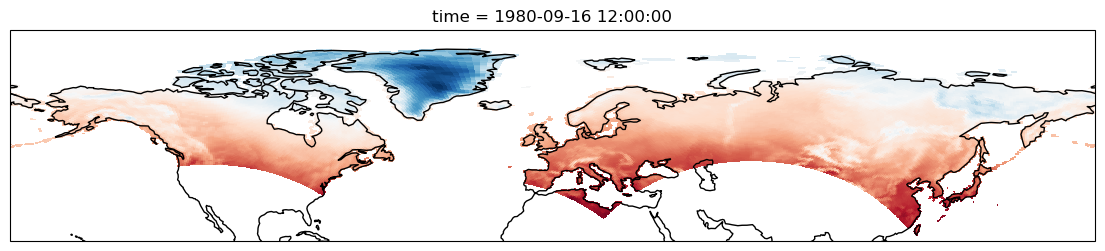

                                                                                              
                                  Total time elapsed: 1.034 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                11 CPU function calls in 0.016 seconds                        
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Series   │ 0          │ 0.000       │ 0.000       │ 10         │ 0.015       │ 0.001       │
│ isna     │ 0          │ 0.000       │ 0.000       │ 1          │ 0.001       │ 0.001       │
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Series
- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=311385;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [10]:
%%cudf.pandas.profile

plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds.Tair.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x="xc", y="yc", add_colorbar=False)
ax.coastlines()
ax.set_ylim([20, 90]);

### Using `where` with Multiple Conditions


In Xarray's `.where()` function, boolean conditions can be combined using logical operators. The bitwise `and` operator (`&`) and the bitwise `or` operator (`|`) are relevant in this case. This allows for specifying multiple masking conditions within a single `.where()` statement.

We can select data for one specific region using bound boxes. For example, here we want to access data over a region over Alaska :

In [11]:
%%cudf.pandas.profile

# -- define a region
min_lon = 190
min_lat = 55
max_lon = 230
max_lat = 85

                                                                                              
                                  Total time elapsed: 0.033 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

First we have to create our boolean masks:

In [12]:
%%cudf.pandas.profile

mask_lon = (ds.xc >= min_lon) & (ds.xc <= max_lon)
mask_lat = (ds.yc >= min_lat) & (ds.yc <= max_lat)

                                                                                              
                                  Total time elapsed: 0.075 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                14 CPU function calls in 0.018 seconds                        
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Series   │ 0          │ 0.000       │ 0.000       │ 10         │ 0.015       │ 0.001       │
│ isna     │ 0          │ 0.000       │ 0.000       │ 4          │ 0.003       │ 0.001       │
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Series
- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=492468;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

Next, we can use the boolean masks for filtering data for that region: 

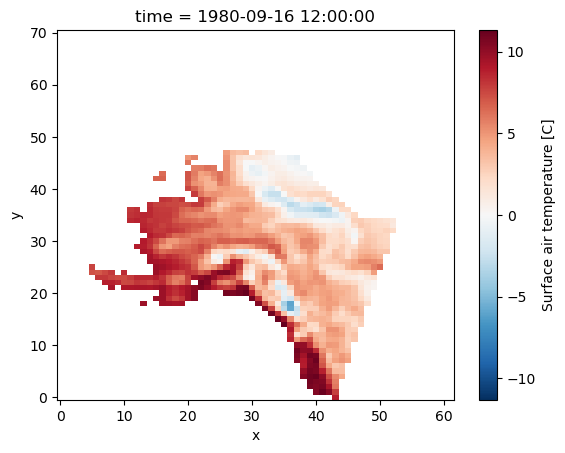

                                                                                                        
                                       Total time elapsed: 1.511 seconds                                
                                     22 GPU function calls in 0.007 seconds                             
                                     32 CPU function calls in 0.040 seconds                             
                                                                                                        
                                                     Stats                                              
                                                                                                        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function           ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Series             │ 0          │ 0.000       │ 0.000       │ 23         │ 0.034       │ 0.001       │
│ isna               │ 0          │ 0.000       │ 0.000       │ 9          │ 0.006       │ 0.001       │
│ Index              │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ RangeIndex.__len__ │ 18         │ 0.006       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Series
- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=385448;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [13]:
%%cudf.pandas.profile

da_masked = da.where(mask_lon & mask_lat, drop=True)

da_masked.plot();

(-180.0, -120.0)

/datasets/charlesb/miniforge3/envs/cudf-xarray-tutorial/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


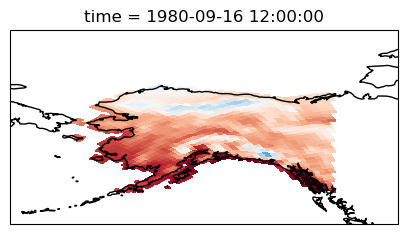

                                                                                              
                                  Total time elapsed: 1.491 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                11 CPU function calls in 0.016 seconds                        
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Series   │ 0          │ 0.000       │ 0.000       │ 10         │ 0.015       │ 0.002       │
│ isna     │ 0          │ 0.000       │ 0.000       │ 1          │ 0.001       │ 0.001       │
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Series
- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=586172;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [14]:
%%cudf.pandas.profile

plt.figure(figsize=(5, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
da_masked.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x="xc", y="yc", add_colorbar=False)
ax.coastlines()
ax.set_ylim([50, 80])
ax.set_xlim([-180, -120]);

### Exercise

If we load air temperature dataset from NCEP, we could use `sel` method for selecting a region:


````{exercise}
:label: boolean-1

If we load air temperature dataset from NCEP, we could use `sel` method for selecting a region:

```python
ds = xr.tutorial.open_dataset("air_temperature")
ds_region = ds.sel(lat=slice(75,50), lon=slice(250,300))

ds_region.air.plot();
```
Can you use a similar method as above using `sel` to crop a region using the RASM dataset? Why?

````

````{solution} boolean-1
:class: dropdown
This method will not work here as the dimensions are different from coordinates here.  Specifically, the variables xc (longitude) and yc (latitude) are two-dimensional scalar fields, which differ from the logical coordinates represented by x and y.

So the code below will not give the correct answer!
```python
cropped_ds = ds.sel(x=slice(min_lat,max_lat), y=slice(min_lon,max_lon))
cropped_ds.Tair.plot()
```
````


### Using `xr.where` with a Function

We can use `xr.where` with a function as a condition too. For example, here we want to convert temperature to Kelvin and find if temperature is greater than 280 K:


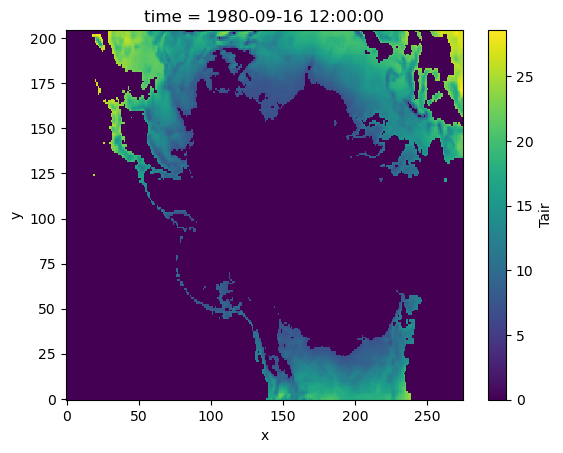

                                                                                                        
                                       Total time elapsed: 1.517 seconds                                
                                     22 GPU function calls in 0.008 seconds                             
                                     7 CPU function calls in 0.009 seconds                              
                                                                                                        
                                                     Stats                                              
                                                                                                        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function           ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Series             │ 0          │ 0.000       │ 0.000       │ 4          │ 0.007       │ 0.002       │
│ isna               │ 0          │ 0.000       │ 0.000       │ 3          │ 0.002       │ 0.001       │
│ Index              │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ RangeIndex.__len__ │ 18         │ 0.006       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Series
- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=799388;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [15]:
%%cudf.pandas.profile

# Define a function to use as a condition
def is_greater_than_threshold(x, threshold=300):
    # function to convert temp to K
    # and compare with threshold
    x = x + 273.15
    return x > threshold


# Apply the condition using xarray.where()
masked_data = xr.where(is_greater_than_threshold(da, 280), da, 0)

masked_data.plot()

## Selecting Values with `isin`

To check whether elements of an xarray object contain a single object, you can compare with the equality operator `==` (e.g., `arr == 3`). 

To check multiple values, we use `isin()`:

Here is a simple example: 

In [16]:
%%cudf.pandas.profile

x_da = xr.DataArray([1, 2, 3, 4, 5], dims=["x"])

# -- select points with values equal to 2 and 4:
x_da.isin([2, 4])

<xarray.DataArray (x: 5)>
array([False,  True, False,  True, False])
Dimensions without coordinates: x

                                                                                              
                                  Total time elapsed: 0.049 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

```{tip}
`isin()` works particularly well with `where()` to support indexing by arrays that are not already labels of an array. 
```

For example, we have another `DataArray` that displays the status flags of the data-collecting device for our data. 

Here, flags with value 0 and -1 signifies the device was functioning correctly, while 0 indicates a malfunction, implying that the resulting data collected may not be accurate.

In [17]:
%%cudf.pandas.profile

flags = xr.DataArray(np.random.randint(-1, 5, da.shape), dims=da.dims, coords=da.coords)
flags

<xarray.DataArray (y: 205, x: 275)>
array([[3, 0, ..., 4, 0],
       [2, 0, ..., 1, 1],
       ...,
       [0, 2, ..., 1, 0],
       [3, 1, ..., 4, 4]])
Coordinates:
    time     object 1980-09-16 12:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: y, x

                                                                                              
                                  Total time elapsed: 0.077 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                1 CPU function calls in 0.002 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Series   │ 0          │ 0.000       │ 0.000       │ 1          │ 0.002       │ 0.002       │
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Series

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=330710;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

Now, we want to only see the data for points where out measurement device is working correctly: 

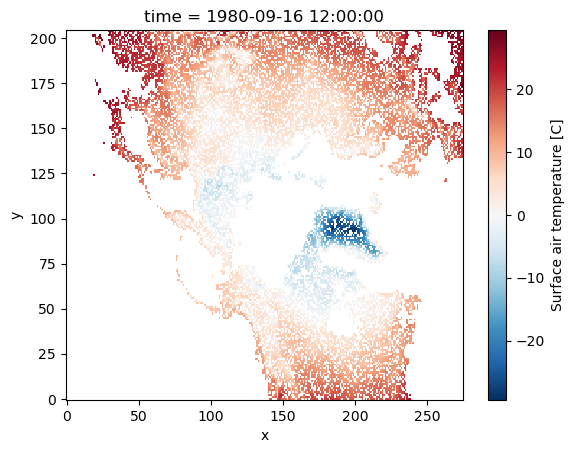

                                                                                                        
                                       Total time elapsed: 1.553 seconds                                
                                     22 GPU function calls in 0.008 seconds                             
                                     25 CPU function calls in 0.031 seconds                             
                                                                                                        
                                                     Stats                                              
                                                                                                        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function           ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Series             │ 0          │ 0.000       │ 0.000       │ 18         │ 0.026       │ 0.001       │
│ isna               │ 0          │ 0.000       │ 0.000       │ 7          │ 0.005       │ 0.001       │
│ Index              │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ RangeIndex.__len__ │ 18         │ 0.006       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Series
- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=647190;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [18]:
%%cudf.pandas.profile

da_masked = da.where(flags.isin([1, 2, 3, 4, 5]), drop=True)
da_masked.plot();

```{warning}
Please note that when done repeatedly, this type of indexing is significantly slower than using `sel()`. 

Use `sel` instead of `where` as much as possible.
```

## Additional Resources

- [Xarray Docs - Indexing and Selecting Data](https://docs.xarray.dev/en/stable/indexing.html)
